# FDTD(Finite Difference- Time Domain) Basics
 FDTD is a numerical method solving Maxwell's equations in time domain. The underlying principle is approximating the space as a grid, named as Yee Grid, and assigning E and H field parameters for each grid. In addition to this, Maxwell's equatıons are expressed in discrete form by linear approximation. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

After importing necessary data, field constrains are defined

In [2]:
Z_0=376.73031#impedance of free space

ds=1e-2 #Spacing between each cell(1 cm)
c=3e+8 #speed of the light
dt=ds/c #Time step

## Wave Propagation in Free Space

In [3]:
spatial_size=100
time_steps=110

E_z=np.zeros(spatial_size)
H_y=np.zeros(spatial_size)

sampler=np.zeros(time_steps)

for i in range(time_steps):
    for j in range(spatial_size-1):
        H_y[j]+=(E_z[j+1]-E_z[j])/Z_0
    
    for j in range(spatial_size):
        E_z[j]+=(H_y[j]-H_y[j-1])*Z_0
                 
    sampler[i]=E_z[50]
    
    E_z[0]=np.math.sin(0.49762827632*i)#sin(2*pi*f*dt*time_step) 2.4GHz 

plt.ylabel("Electric Field Strenght( Arb-Units)")
plt.xlabel("Time(Arb-units)")
plt.plot(sampler)

## Viewing Entire Field Through Time

In [4]:
spatial_size=100
time_steps=100

E_z=np.zeros(spatial_size)
H_y=np.zeros(spatial_size)

graph=np.zeros((time_steps,spatial_size))

for i in range(time_steps):
    for j in range(spatial_size-1):
        H_y[j]+=(E_z[j+1]-E_z[j])/Z_0
    
    for j in range(spatial_size):
        E_z[j]+=(H_y[j]-H_y[j-1])*Z_0
                 
    graph[i]=E_z
    
    E_z[0]=np.math.sin(0.49762827632*i)#sin(2*pi*f*dt*time_step) 2.4GHz 

plt.xlabel("Space (Arb-Units)")
plt.ylabel("Time (Arb-units)")
plt.imshow(graph)

## Sending A Pulse

In [5]:
spatial_size=100
time_steps=100

E_z=np.zeros(spatial_size)
H_y=np.zeros(spatial_size)

graph=np.zeros((time_steps,spatial_size))

for i in range(time_steps):
    for j in range(spatial_size-1):
        H_y[j]+=(E_z[j+1]-E_z[j])/Z_0
    
    for j in range(spatial_size):
        E_z[j]+=(H_y[j]-H_y[j-1])*Z_0
                 
    graph[i]=E_z
    if i<=25:#Sending exactly 2 optical pulse
        E_z[0]=np.math.sin(0.49762827632*i)#sin(2*pi*f*dt*time_step) 2.4GHz 

plt.xlabel("Space (Arb-Units)")
plt.ylabel("Time (Arb-units)")
plt.imshow(graph)

## Mirror
Given enough time, if the field reaches the boundary, then it is reflected

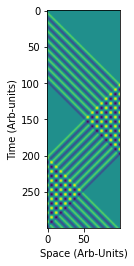

In [9]:
spatial_size=100
time_steps=300

E_z=np.zeros(spatial_size)
H_y=np.zeros(spatial_size)

graph=np.zeros((time_steps,spatial_size))

for i in range(time_steps):
    for j in range(spatial_size-1):
        H_y[j]+=(E_z[j+1]-E_z[j])/Z_0
    
    for j in range(spatial_size):
        E_z[j]+=(H_y[j]-H_y[j-1])*Z_0
                 
    graph[i]=E_z
    if i<=100:#Sending exactly 8 optical pulse
        E_z[0]=np.math.sin(0.49762827632*i)#sin(2*pi*f*dt*time_step) 2.4GHz 

plt.xlabel("Space (Arb-Units)")
plt.ylabel("Time (Arb-units)")
plt.imshow(graph)